https://github.com/Dexson-Dsouza/Classical-Music-Genre-Classification

In [18]:
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import config1
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [19]:
#all composers with more than 10 recordings in the dataset(from excel analaysis)
composer_list = ['Beethoven', 'Bach', 'Schubert', 'Mozart', 'Brahms']

In [36]:
df = pd.read_csv("../../../Musicnet+ Stuff/MusicNet_Original/musicnet_original_metadata.csv", encoding="ISO-8859-1")
#row = df.loc[df['id'] == 1727]
#print(row)
df['composer'].value_counts()

composer
Beethoven    157
Bach          67
Schubert      30
Mozart        24
Brahms        24
Cambini        9
Dvorak         8
Faure          4
Ravel          4
Haydn          3
Name: count, dtype: int64

In [26]:
import librosa
import numpy
import pandas
import os
import sklearn
import config1

def main():
    samp_rate = config1.CreateDataset.SAMPLING_RATE
    frame_size = config1.CreateDataset.FRAME_SIZE
    hop_size = config1.CreateDataset.HOP_SIZE
    dataset_dir = config1.CreateDataset.DATASET_DIRECTORY
    print(dataset_dir)

    sub_folders = get_subdirectories(dataset_dir)

    labels = []
    is_created = False

    print("Extracting features from audios...")
    for sub_folder in sub_folders:
        print(".....Working in folder:", sub_folder)
        audios_path = get_audios_path(dataset_dir, sub_folder, samp_rate)
        
        for audio_path in audios_path:
            #print(audio_path)

            #find the composer label from the audio_path
            audio_name = audio_path.split('\\')[-1]
            audio_name = audio_name[0:-4]

            #print(audio_name)
            row = df.loc[df['id'] == int(audio_name)]
            #print(row)
            label = row.iloc[0]['composer']
            #print(label)
            
            if label in composer_list:
                #print(label)
                row = extract_features(audio_path, samp_rate, frame_size, hop_size)
                if not is_created:
                    dataset_numpy = numpy.array(row)
                    is_created = True
                elif is_created:
                    dataset_numpy = numpy.vstack((dataset_numpy, row))
                
                labels.append(label)
                

    print("Normalizing the data...")
    scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
    dataset_numpy = scaler.fit_transform(dataset_numpy)

    Feature_Names = ['meanZCR', 'stdZCR', 'meanSpecCentroid', 'stdSpecCentroid', 'meanSpecContrast', 'stdSpecContrast',
                     'meanSpecBandwidth', 'stdSpecBandwidth', 'meanSpecRollof', 'stdSpecRollof',
                     'meanMFCC_1', 'stdMFCC_1', 'meanMFCC_2', 'stdMFCC_2', 'meanMFCC_3', 'stdMFCC_3',
                     'meanMFCC_4', 'stdMFCC_4', 'meanMFCC_5', 'stdMFCC_5', 'meanMFCC_6', 'stdMFCC_6',
                     'meanMFCC_7', 'stdMFCC_7', 'meanMFCC_8', 'stdMFCC_8', 'meanMFCC_9', 'stdMFCC_9',
                     'meanMFCC_10', 'stdMFCC_10', 'meanMFCC_11', 'stdMFCC_11', 'meanMFCC_12', 'stdMFCC_12',
                     'meanMFCC_13', 'stdMFCC_13'
                     ]
    dataset_pandas = pandas.DataFrame(dataset_numpy, columns=Feature_Names)

    dataset_pandas["composer"] = labels
    dataset_pandas.to_csv("data_set_composer.csv", index=False)
    print("Data set has been created and sent to the project folder!")

def get_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]


def get_audios_path(dataset_dir, folder_name, samp_rate):
    path_of_audios = librosa.util.find_files(dataset_dir + "/" + folder_name)
    return path_of_audios


def extract_features(audio_path, sample_rate, frame_size, hop_size):
    x, sr = librosa.load(audio_path, sr=sample_rate, duration=5.0)
    signal = x
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=signal, frame_length=frame_size, hop_length=hop_size)
    spectral_centroid = librosa.feature.spectral_centroid(y=signal, sr=sample_rate, n_fft=frame_size,
                                                          hop_length=hop_size)
    spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sample_rate, n_fft=frame_size,
                                                          hop_length=hop_size)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=signal, sr=sample_rate, n_fft=frame_size,
                                                            hop_length=hop_size)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)

    return [

        numpy.mean(zero_crossing_rate),
        numpy.std(zero_crossing_rate),
        numpy.mean(spectral_centroid),
        numpy.std(spectral_centroid),
        numpy.mean(spectral_contrast),
        numpy.std(spectral_contrast),
        numpy.mean(spectral_bandwidth),
        numpy.std(spectral_bandwidth),
        numpy.mean(spectral_rolloff),
        numpy.std(spectral_rolloff),

        numpy.mean(mfccs[1, :]),
        numpy.std(mfccs[1, :]),
        numpy.mean(mfccs[2, :]),
        numpy.std(mfccs[2, :]),
        numpy.mean(mfccs[3, :]),
        numpy.std(mfccs[3, :]),
        numpy.mean(mfccs[4, :]),
        numpy.std(mfccs[4, :]),
        numpy.mean(mfccs[5, :]),
        numpy.std(mfccs[5, :]),
        numpy.mean(mfccs[6, :]),
        numpy.std(mfccs[6, :]),
        numpy.mean(mfccs[7, :]),
        numpy.std(mfccs[7, :]),
        numpy.mean(mfccs[8, :]),
        numpy.std(mfccs[8, :]),
        numpy.mean(mfccs[9, :]),
        numpy.std(mfccs[9, :]),
        numpy.mean(mfccs[10, :]),
        numpy.std(mfccs[10, :]),
        numpy.mean(mfccs[11, :]),
        numpy.std(mfccs[11, :]),
        numpy.mean(mfccs[12, :]),
        numpy.std(mfccs[12, :]),
        numpy.mean(mfccs[13, :]),
        numpy.std(mfccs[13, :]),
    ]


if __name__ == '__main__':
    main()


../../../Musicnet+ Stuff/Musicnet_Original
Extracting features from audios...
.....Working in folder: MusicNet_Original
Normalizing the data...
Data set has been created and sent to the project folder!


In [28]:
data_set=pandas.read_csv('data_set_composer.csv',index_col=False)

number_of_rows,number_of_cols = data_set.shape
data_set.head()

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,...,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,composer
0,-0.696744,-0.888524,-0.424152,-0.801467,0.460187,0.122934,-0.244701,-0.639535,-0.589279,-0.622902,...,-0.293283,-0.330965,-0.659713,-0.296609,-0.063064,-0.125990,0.105065,-0.110590,-0.194082,Schubert
1,-0.512554,-0.778893,-0.092590,-0.514000,0.314383,0.410231,-0.055632,-0.478221,-0.248418,-0.278858,...,-0.146735,-0.207687,-0.011170,-0.144478,-0.242043,-0.057418,-0.212960,-0.152287,-0.369426,Schubert
2,-0.515206,-0.821211,0.078547,-0.722635,0.447631,0.453474,0.278785,-0.714754,0.023377,-0.599375,...,-0.676733,0.003991,-0.481902,0.188085,-0.384031,0.029818,-0.466466,0.152035,-0.326422,Schubert
3,-0.750938,-0.864614,-0.327462,-0.700062,0.335920,0.322875,-0.068403,-0.661911,-0.447257,-0.519036,...,-0.782216,-0.133070,-0.708793,0.015649,-0.703590,-0.117803,-0.522582,-0.312779,-0.748782,Schubert
4,-0.860725,-0.887692,-0.764027,-0.603685,0.183636,-0.168561,-0.724036,-0.124136,-0.823938,-0.562108,...,-0.828052,-0.079088,-0.739913,-0.042404,-0.793009,0.112454,-0.858340,0.138266,-0.653216,Schubert


In [30]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.2,random_state=2,
                              stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))
#should have 302 in total

Training data size: (241, 37)
Test data size: (61, 37)


In [31]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,composer_list):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=composer_list,title='Confusion matrix')
    plt.show()
    

Max Accuracy is 0.803 on test dataset with 4 neighbors.

Training Score: 0.743
Test score: 0.803
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Beethoven' 'Beethoven' 'Beethoven' 'Bach' 'Brahms' 'Brahms' 'Beethoven'
 'Beethoven' 'Schubert' 'Schubert' 'Beethoven' 'Beethoven' 'Bach' 'Bach'
 'Beethoven' 'Beethoven' 'Mozart' 'Beethoven' 'Beethoven' 'Brahms'
 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven'
 'Beethoven' 'Bach' 'Brahms' 'Beethoven' 'Beethoven' 'Beethoven'
 'Schubert' 'Bach' 'Beethoven' 'Bach' 'Beethoven' 'Bach' 'Schubert'
 'Mozart' 'Beethoven' 'Beethoven' 'Mozart' 'Mozart' 'Bach' 'Beethoven'
 'Beethoven' 'Bach' 'Schubert' 'Bach' 'Bach' 'Beethoven' 'Bach'
 'Beethoven' 'Mozart' 'Bach' 'Beethoven' 'Beethoven' 'Schubert' 'Brahms'
 'Beethoven']

Predicted Test dataset labels: 
['Beethoven' 'Beethoven' 'Beethoven' 'Bach' 'Brahms' 'Brahms' 'Beethoven'
 'Beethoven' 'Bach' 'Beethoven' 'Beethoven' 'Beethoven' 'Bac

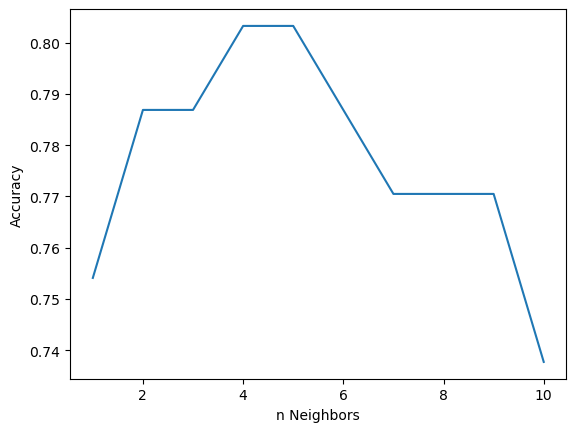

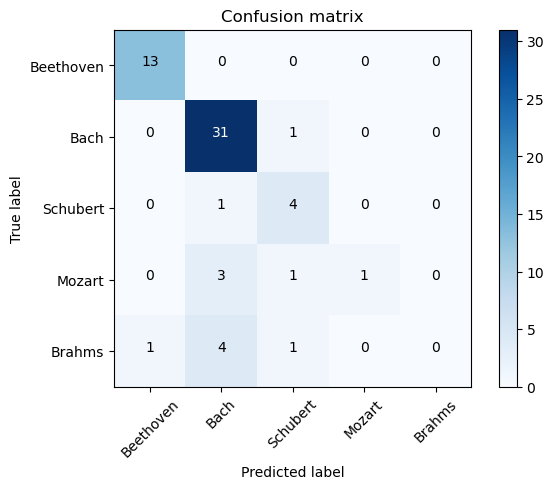

In [32]:
results_knn=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(numpy.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")

knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)
print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  
plot_cnf(knn,test_x,test_y,composer_list)

Max Accuracy is 0.721 on test dataset with 2 estimators.

Training Score: 0.834
Test score: 0.721
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Beethoven' 'Beethoven' 'Beethoven' 'Bach' 'Brahms' 'Brahms' 'Beethoven'
 'Beethoven' 'Schubert' 'Schubert' 'Beethoven' 'Beethoven' 'Bach' 'Bach'
 'Beethoven' 'Beethoven' 'Mozart' 'Beethoven' 'Beethoven' 'Brahms'
 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven'
 'Beethoven' 'Bach' 'Brahms' 'Beethoven' 'Beethoven' 'Beethoven'
 'Schubert' 'Bach' 'Beethoven' 'Bach' 'Beethoven' 'Bach' 'Schubert'
 'Mozart' 'Beethoven' 'Beethoven' 'Mozart' 'Mozart' 'Bach' 'Beethoven'
 'Beethoven' 'Bach' 'Schubert' 'Bach' 'Bach' 'Beethoven' 'Bach'
 'Beethoven' 'Mozart' 'Bach' 'Beethoven' 'Beethoven' 'Schubert' 'Brahms'
 'Beethoven']

Predicted Test dataset labels: 
['Beethoven' 'Brahms' 'Beethoven' 'Bach' 'Brahms' 'Brahms' 'Beethoven'
 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' '

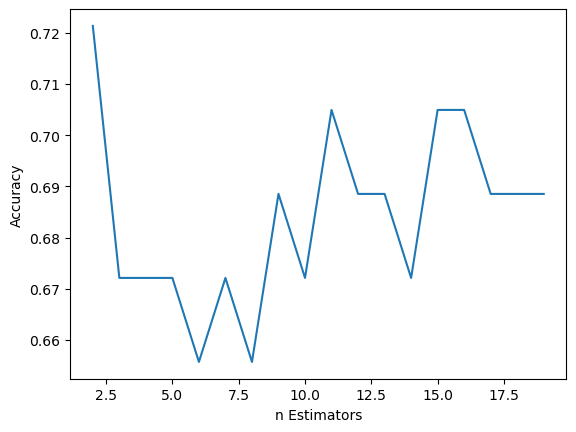

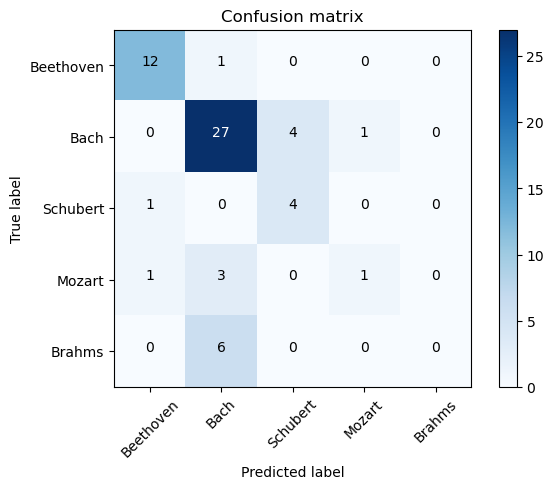

In [33]:
results_forest=[]
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(numpy.arange(2,20),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

plot_cnf(forest,test_x,test_y,composer_list)

Training Score: 0.996
Test score: 0.738
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Beethoven' 'Beethoven' 'Beethoven' 'Bach' 'Brahms' 'Brahms' 'Beethoven'
 'Beethoven' 'Schubert' 'Schubert' 'Beethoven' 'Beethoven' 'Bach' 'Bach'
 'Beethoven' 'Beethoven' 'Mozart' 'Beethoven' 'Beethoven' 'Brahms'
 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven'
 'Beethoven' 'Bach' 'Brahms' 'Beethoven' 'Beethoven' 'Beethoven'
 'Schubert' 'Bach' 'Beethoven' 'Bach' 'Beethoven' 'Bach' 'Schubert'
 'Mozart' 'Beethoven' 'Beethoven' 'Mozart' 'Mozart' 'Bach' 'Beethoven'
 'Beethoven' 'Bach' 'Schubert' 'Bach' 'Bach' 'Beethoven' 'Bach'
 'Beethoven' 'Mozart' 'Bach' 'Beethoven' 'Beethoven' 'Schubert' 'Brahms'
 'Beethoven']

Predicted Test dataset labels: 
['Beethoven' 'Beethoven' 'Beethoven' 'Bach' 'Brahms' 'Brahms' 'Beethoven'
 'Beethoven' 'Bach' 'Beethoven' 'Beethoven' 'Beethoven' 'Bach' 'Bach'
 'Schubert' 'Mozart' 'Beethoven' 'Schubert' 'Be

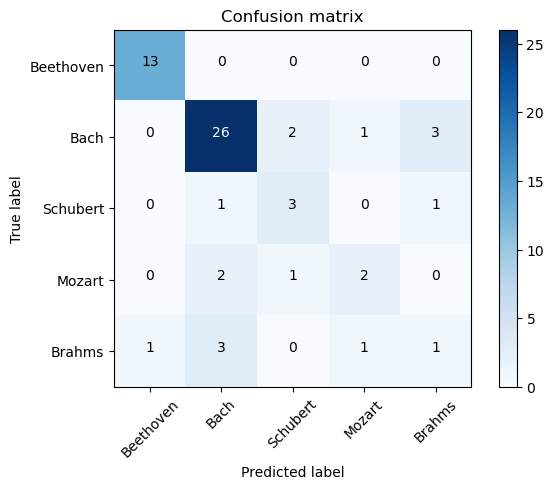

In [34]:
svm=SVC(C=100,gamma=0.08)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

plot_cnf(svm,test_x,test_y,composer_list)

Training Score: 1.000
Test score: 0.689
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Beethoven' 'Beethoven' 'Beethoven' 'Bach' 'Brahms' 'Brahms' 'Beethoven'
 'Beethoven' 'Schubert' 'Schubert' 'Beethoven' 'Beethoven' 'Bach' 'Bach'
 'Beethoven' 'Beethoven' 'Mozart' 'Beethoven' 'Beethoven' 'Brahms'
 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven'
 'Beethoven' 'Bach' 'Brahms' 'Beethoven' 'Beethoven' 'Beethoven'
 'Schubert' 'Bach' 'Beethoven' 'Bach' 'Beethoven' 'Bach' 'Schubert'
 'Mozart' 'Beethoven' 'Beethoven' 'Mozart' 'Mozart' 'Bach' 'Beethoven'
 'Beethoven' 'Bach' 'Schubert' 'Bach' 'Bach' 'Beethoven' 'Bach'
 'Beethoven' 'Mozart' 'Bach' 'Beethoven' 'Beethoven' 'Schubert' 'Brahms'
 'Beethoven']

Predicted Test dataset labels: 
['Beethoven' 'Beethoven' 'Beethoven' 'Bach' 'Brahms' 'Brahms' 'Beethoven'
 'Beethoven' 'Schubert' 'Beethoven' 'Beethoven' 'Beethoven' 'Bach'
 'Beethoven' 'Beethoven' 'Beethoven' 'Beethoven' '

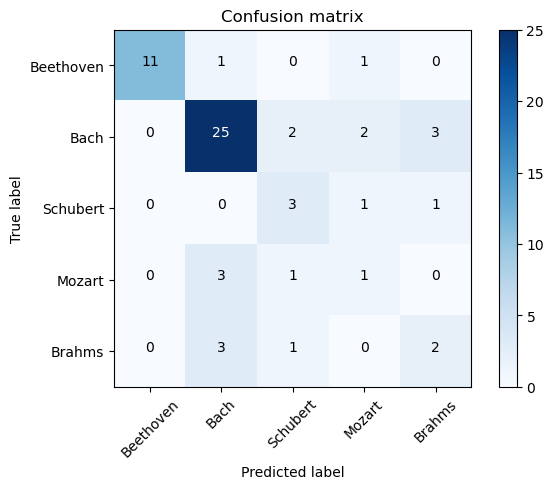

In [35]:
neural=MLPClassifier(max_iter=1000,random_state=2,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))

plot_cnf(neural,test_x,test_y,composer_list)